In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# define the path to the dataset directory
DATASET_PATH = 'CS552J_DMDL_Assessment_1_Dataset'

# define the size of the images
IMG_SIZE = (224, 224)

# define the number of channels
CHANNELS = 3

# define the label categories
CATEGORIES = ['Covid-19', 'Normal']

# initialize the data and labels arrays
data = []
labels = []

# loop over the image paths
for category in CATEGORIES:
    path = os.path.join(DATASET_PATH, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path)
        image = cv2.resize(image, IMG_SIZE)
        image = np.array(image, dtype=np.float32)
        image /= 255.0
        data.append(image)
        labels.append(category)

# convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# split the dataset into training, validation, and testing sets
(train_data, test_data, train_labels, test_labels) = train_test_split(data, labels, test_size=0.2, random_state=42)
(train_data, val_data, train_labels, val_labels) = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [3]:
print(train_labels)

['Covid-19' 'Covid-19' 'Covid-19' 'Normal' 'Covid-19' 'Covid-19' 'Normal'
 'Normal' 'Covid-19' 'Normal' 'Normal' 'Covid-19' 'Covid-19' 'Covid-19'
 'Normal' 'Covid-19' 'Normal' 'Covid-19' 'Covid-19' 'Normal' 'Normal'
 'Covid-19' 'Covid-19' 'Normal' 'Covid-19' 'Normal' 'Normal' 'Covid-19'
 'Normal' 'Normal' 'Normal' 'Covid-19' 'Covid-19' 'Normal' 'Normal'
 'Normal' 'Covid-19' 'Covid-19' 'Covid-19' 'Normal' 'Normal' 'Normal'
 'Normal' 'Covid-19' 'Covid-19' 'Covid-19' 'Normal' 'Covid-19' 'Normal'
 'Covid-19' 'Normal' 'Normal' 'Covid-19' 'Normal' 'Normal' 'Covid-19'
 'Covid-19' 'Covid-19' 'Normal' 'Covid-19' 'Normal' 'Covid-19' 'Covid-19'
 'Normal' 'Normal' 'Covid-19' 'Normal' 'Covid-19' 'Normal' 'Covid-19'
 'Covid-19' 'Covid-19' 'Normal' 'Covid-19' 'Covid-19' 'Normal' 'Normal'
 'Covid-19' 'Normal' 'Normal' 'Normal' 'Normal' 'Covid-19' 'Normal'
 'Normal' 'Normal' 'Covid-19' 'Normal' 'Covid-19' 'Normal' 'Normal'
 'Covid-19' 'Covid-19' 'Covid-19' 'Normal' 'Normal' 'Covid-19' 'Covid-19'
 'Norm

In [4]:
# define label encoder
label_encoder = {'Covid-19': 1, 'Normal': 0}

# convert labels to numerical values
train_labels = np.array([label_encoder[label] for label in train_labels])
val_labels = np.array([label_encoder[label] for label in val_labels])
test_labels = np.array([label_encoder[label] for label in test_labels])

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

from tensorflow.keras.optimizers import Adam

c:\Users\abhij\.conda\envs\image_ML2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\abhij\.conda\envs\image_ML2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\abhij\.conda\envs\image_ML2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\abhij\.conda\envs\image_ML2\lib\site-packages\tensorflow\pyth

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_data, train_labels, batch_size=32)
val_generator = val_datagen.flow(val_data, val_labels, batch_size=32)
test_generator = test_datagen.flow(test_data, test_labels, batch_size=32)

# Define individual models
model_cnn3 = Sequential()
model_cnn3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(0.001)))
model_cnn3.add(MaxPooling2D((2, 2)))
model_cnn3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_cnn3.add(MaxPooling2D((2, 2)))
model_cnn3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_cnn3.add(MaxPooling2D((2, 2)))
model_cnn3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_cnn3.add(MaxPooling2D((2, 2)))
model_cnn3.add(Flatten())
model_cnn3.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_cnn3.add(Dropout(0.5))
model_cnn3.add(Dense(1, activation='sigmoid'))
opt = Adam(lr=0.0001)
model_cnn3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history1 = model_cnn3.fit_generator(train_datagen.flow(train_data, train_labels, batch_size=32), steps_per_epoch=len(train_data)//32, epochs=100, validation_data=val_datagen.flow(val_data, val_labels), validation_steps=len(val_data)//32, callbacks=[es])


# Define individual models
model_cnn4 = Sequential()
model_cnn4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(0.001)))
model_cnn4.add(MaxPooling2D((2, 2)))
model_cnn4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_cnn4.add(MaxPooling2D((2, 2)))
model_cnn4.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_cnn4.add(MaxPooling2D((2, 2)))
model_cnn4.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_cnn4.add(MaxPooling2D((2, 2)))
model_cnn4.add(Flatten())
model_cnn4.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_cnn4.add(Dropout(0.5))
model_cnn4.add(Dense(1, activation='sigmoid'))
opt = Adam(lr=0.0001)
model_cnn4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model_cnn4.fit_generator(train_datagen.flow(train_data, train_labels, batch_size=32), steps_per_epoch=len(train_data)//32, epochs=100, validation_data=val_datagen.flow(val_data, val_labels), validation_steps=len(val_data)//32, callbacks=[es])


# Predictions of individual models
pred1 = model_cnn3.predict(test_data)
pred2 = model_cnn4.predict(test_data)

# Average predictions of individual models
ensemble_pred = (pred1 + pred2) / 2

# Convert predictions to binary values
ensemble_pred_binary = (ensemble_pred > 0.5).astype('int')

# Evaluate individual models
loss1, acc1 = model_cnn3.evaluate(test_data, test_labels, verbose=0)
loss2, acc2 = model_cnn4.evaluate(test_data, test_labels, verbose=0)

# Evaluate ensemble model
ensemble_loss, ensemble_acc = model_cnn3.evaluate(test_data, ensemble_pred_binary, verbose=0)

print('Individual model 1 - Loss: {}, Accuracy: {}'.format(loss1, acc1))
print('Individual model 2 - Loss: {}, Accuracy: {}'.format(loss2, acc2))
print('Ensemble model - Loss: {}, Accuracy: {}'.format(ensemble_loss, ensemble_acc))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
4/4 [==============================] - 4s 1s/step - loss: 1.9278 - acc: 0.4766 - val_loss: 1.8873 - val_acc: 0.4688
Epoch 2/100
4/4 [==============================] - 1s 264ms/step - loss: 1.8630 - acc: 0.4922 - val_loss: 1.8230 - val_acc: 0.4688
Epoch 3/100
4/4 [==============================] - 1s 275ms/step - loss: 1.7994 - acc: 0.5469 - val_loss: 1.7607 - val_acc: 0.4688
Epoch 4/100
4/4 [==============================] - 1s 258ms/step - loss: 1.7381 - acc: 0.5000 - val_loss: 1.7011 - val_acc: 0.4688
Epoch 5/100
4/4 [==============================] - 1s 263ms/step - loss: 1.6796 - acc: 0.5469 - val_loss: 1.6443 - val_acc: 0.6250
Epoch 6/100
4/4 [==============================] - 1s 249ms/step - loss: 1.6238 - acc: 0.5156 - val_loss: 1.5904 - val_acc: 0.4688
Epoch

In [6]:

# Evaluate individual models
loss1, acc1 = model_cnn3.evaluate(test_data, test_labels, verbose=0)
loss2, acc2 = model_cnn4.evaluate(test_data, test_labels, verbose=0)

# Evaluate ensemble model
ensemble_loss, ensemble_acc = model_cnn3.evaluate(test_data, ensemble_pred_binary, verbose=0)

# display results
print('Individual model 1 - Loss: {}, Accuracy: {}'.format(loss1, acc1))
print('Individual model 2 - Loss: {}, Accuracy: {}'.format(loss2, acc2))
print('Ensemble model - Loss: {}, Accuracy: {}'.format(ensemble_loss, ensemble_acc))

Individual model 1 - Loss: 45.87810516357422, Accuracy: 0.550000011920929
Individual model 2 - Loss: 0.7218674898147583, Accuracy: 0.5249999761581421
Ensemble model - Loss: 0.09719023555517196, Accuracy: 1.0


In [7]:
# define the FNN model
model_fnn = Sequential()
model_fnn.add(Dense(512, activation='relu', input_shape=(150528,)))
model_fnn.add(Dropout(0.5))
model_fnn.add(Dense(256, activation='relu'))
model_fnn.add(Dropout(0.5))
model_fnn.add(Dense(1, activation='sigmoid'))

# compile the FNN model
model_fnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the FNN model
history_fnn = model_fnn.fit(train_data.reshape((train_data.shape[0], -1)), train_labels, epochs=50, batch_size=32, validation_data=(val_data.reshape((val_data.shape[0], -1)), val_labels), callbacks=[es])

Train on 128 samples, validate on 32 samples
Epoch 1/50
128/128 [==============================] - 0s 3ms/sample - loss: 31.2605 - acc: 0.5859 - val_loss: 35.9631 - val_acc: 0.5312
Epoch 2/50
128/128 [==============================] - 0s 1ms/sample - loss: 44.0968 - acc: 0.6797 - val_loss: 26.6617 - val_acc: 0.5312
Epoch 3/50
128/128 [==============================] - 0s 1ms/sample - loss: 36.3502 - acc: 0.6719 - val_loss: 55.7036 - val_acc: 0.5625
Epoch 4/50
128/128 [==============================] - 0s 1ms/sample - loss: 42.6521 - acc: 0.6875 - val_loss: 10.2732 - val_acc: 0.8438
Epoch 5/50
128/128 [==============================] - 0s 1ms/sample - loss: 36.0089 - acc: 0.7422 - val_loss: 22.4459 - val_acc: 0.8125
Epoch 6/50
128/128 [==============================] - 0s 1ms/sample - loss: 13.7583 - acc: 0.8203 - val_loss: 55.0828 - val_acc: 0.7500
Epoch 7/50
128/128 [==============================] - 0s 1ms/sample - loss: 37.4660 - acc: 0.8047 - val_loss: 29.3118 - val_acc: 0.7500
Epo

In [8]:
# evaluate CNN model
# test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_data, test_labels)

# evaluate FNN model
test_loss_fnn, test_acc_fnn = model_fnn.evaluate(test_data.reshape((test_data.shape[0], -1)), test_labels)

# print('CNN model accuracy:', test_acc_cnn)
print('FNN model accuracy:', test_acc_fnn)
print('FNN model loss:', test_loss_fnn)

40/40 [==============================] - 0s 2ms/sample - loss: 13.4833 - acc: 0.8250
FNN model accuracy: 0.825
FNN model loss: 13.483303260803222


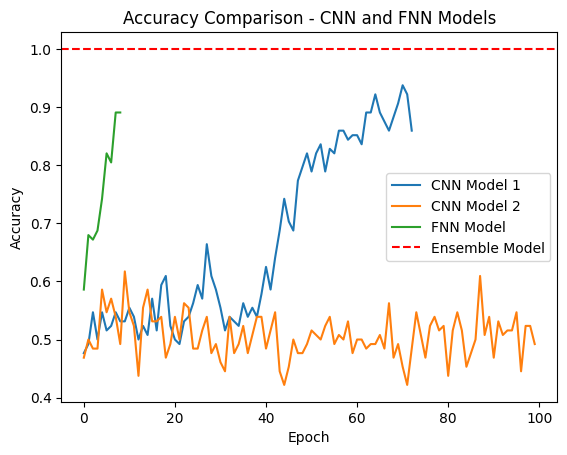

In [11]:
import matplotlib.pyplot as plt

# Plot individual model accuracies
plt.plot(history1.history['acc'], label='CNN Model 1')
plt.plot(history2.history['acc'], label='CNN Model 2')
plt.plot(history_fnn.history['acc'], label='FNN Model')

# Plot ensemble model accuracy
plt.axhline(y=ensemble_acc, color='r', linestyle='--', label='Ensemble Model')

plt.title('Accuracy Comparison - CNN and FNN Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


c:\Users\abhij\.conda\envs\image_ML2\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Epoch 1/100
4/4 [==============================] - 5s 1s/step - loss: 8.3671 - acc: 0.6505 - val_loss: 7.1654 - val_acc: 0.6000
Epoch 2/100
4/4 [==============================] - 1s 190ms/step - loss: 7.6052 - acc: 0.7767 - val_loss: 7.1437 - val_acc: 0.6000
Epoch 3/100
4/4 [==============================] - 1s 240ms/step - loss: 7.1554 - acc: 0.8447 - val_loss: 7.3324 - val_acc: 0.6000
Epoch 4/100
4/4 [==============================] - 1s 256ms/step - loss: 6.4887 - acc: 0.9417 - val_loss: 7.3612 - val_acc: 0.6000
Epoch 5/100
4/4 [==============================] - 1s 248ms/step - loss: 6.6130 - acc: 0.8835 - val_loss: 7.3636 - val_acc: 0.6000
Epoch 6/100
4/4 [==============================] - 1s 236ms/step - loss: 6.3594 - acc: 0.9223 - val_loss: 7.2744 - val_acc: 0.6000
Epoch 7/100
4/4 [==============================] - 1s 240ms/step - loss: 6.1128 - acc: 0.9515 - val_loss: 7.1102 - val_acc: 0.6000
Epoch 8/100
4/4 [==============================] - 1s 239ms/step - loss: 6.2188 - acc:

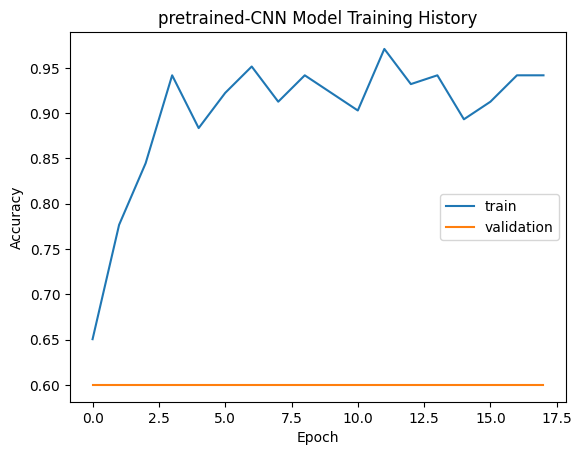

In [14]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# load the pre-trained ResNet-50 model
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the weights of the pre-trained model
for layer in resnet.layers:
    layer.trainable = False

# add new trainable layers
x = resnet.output
x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)

# create the new model
model = Model(inputs=resnet.input, outputs=output)

# learning rate
opt = Adam(lr=0.0001)

# compile the model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2)
train_generator = train_datagen.flow(train_data, train_labels, batch_size=32, subset='training')
val_generator = train_datagen.flow(train_data, train_labels, batch_size=32, subset='validation')

# set up early stopping callback
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

# train the model
history = model.fit(train_generator, epochs=100, validation_data=val_generator, callbacks=[es], batch_size=32)

# history = model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

import matplotlib.pyplot as plt

# plot pretrained-CNN training history
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('pretrained-CNN Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

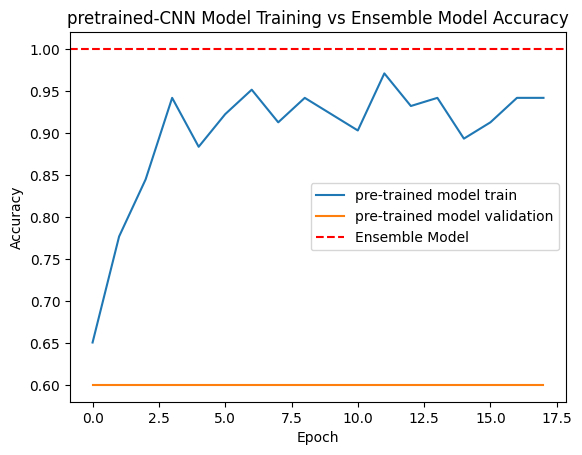

In [15]:
# Compare the performance of the pretrained-CNN model with the CNN_ensemble model

import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='pre-trained model train')
plt.plot(history.history['val_acc'], label='pre-trained model validation')
# Plot ensemble model accuracy
plt.axhline(y=ensemble_acc, color='r', linestyle='--', label='Ensemble Model')

plt.title('pretrained-CNN Model Training vs Ensemble Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
# !pip install bayesian-optimization

from bayes_opt import BayesianOptimization
from tensorflow.keras.callbacks import EarlyStopping

# define the function to be optimized
def cnn_bayesian(learning_rate, l2_reg, dropout_rate):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    opt = Adam(lr=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    # set up data generators
    train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    val_datagen = ImageDataGenerator(rescale=1./255)

    # set up early stopping callback
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

    # fit the model
    history = model.fit_generator(train_datagen.flow(train_data, train_labels, batch_size=32), 
                                  steps_per_epoch=len(train_data)//32, 
                                  epochs=100, 
                                  validation_data=val_datagen.flow(val_data, val_labels), 
                                  validation_steps=len(val_data)//32, 
                                  callbacks=[es],
                                  verbose=0)

    # return the validation accuracy for the final epoch
    return history.history['val_acc'][-1]

# define the parameter bounds for the optimizer
pbounds = {'learning_rate': (1e-6, 1e-2), 'l2_reg': (1e-6, 1e-2), 'dropout_rate': (0, 0.5)}

# create the optimizer object
optimizer = BayesianOptimization(f=cnn_bayesian, pbounds=pbounds, verbose=2, random_state=1)

# run the optimization
optimizer.maximize(n_iter=20)

# print the results
print(optimizer.max)


|   iter    |  target   | dropou... |  l2_reg   | learni... |
-------------------------------------------------------------
| 1         | 0.8125    | 0.2085    | 0.007204  | 2.144e-06 |
Epoch 00058: early stopping
| 2         | 0.5312    | 0.1512    | 0.001468  | 0.0009243 |
Epoch 00034: early stopping
| 3         | 0.4688    | 0.09313   | 0.003456  | 0.003968  |
Epoch 00030: early stopping
| 4         | 0.4688    | 0.2694    | 0.004193  | 0.006853  |
| 5         | 0.4688    | 0.1022    | 0.008781  | 0.0002748 |
Epoch 00046: early stopping
| 6         | 0.5312    | 0.1925    | 0.01      | 0.01      |
| 7         | 0.8125    | 0.2166    | 0.005736  | 1e-06     |
Epoch 00077: early stopping
| 8         | 0.4688    | 0.2132    | 0.0005873 | 0.009737  |
Epoch 00046: early stopping
| 9         | 0.4688    | 0.1138    | 0.001557  | 0.009473  |
Epoch 00051: early stopping
| 10        | 0.4688    | 0.2089    | 0.00735   | 0.00121   |
Epoch 00029: early stopping
| 11        | 0.4688    | 0.2351

ResourceExhaustedError: OOM when allocating tensor with shape[32,32,222,222] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node Adam_21/gradients/max_pooling2d_84/MaxPool_grad/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
